In [1]:
import yfinance as yahooFinance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set(style="darkgrid")
pd.set_option('display.max_rows', None)

In [2]:
def calculate_pct_diff(row):
    pct_diff = []
    for i in range(len(row) - 1):
        # Check for non-missing values and non-zero denominator
        if pd.notna(row.iloc[i+1]) and pd.notna(row.iloc[i]) and row.iloc[i+1] != 0:
            diff = ((row.iloc[i] - row.iloc[i+1]) / row.iloc[i+1]) * 100
            pct_diff.append(diff)
        else:
            pct_diff.append(np.nan)  # Append NaN if denominator is zero or values are missing
    return pct_diff

In [3]:
ticker = "SAN"

 # 1. Stock Information

In [4]:
stock = yahooFinance.Ticker(ticker)

In [5]:
stock_info = stock.info
stock_info

{'address1': 'Santander Group City',
 'address2': 'Av. de Cantabria s/n Boadilla del Monte',
 'city': 'Madrid',
 'zip': '28660',
 'country': 'Spain',
 'phone': '34 912 596520',
 'website': 'https://www.santander.com',
 'industry': 'Banks - Diversified',
 'industryKey': 'banks-diversified',
 'industryDisp': 'Banks - Diversified',
 'sector': 'Financial Services',
 'sectorKey': 'financial-services',
 'sectorDisp': 'Financial Services',
 'longBusinessSummary': 'Banco Santander, S.A. provides various financial products and services to individuals, small and medium-sized enterprises, large corporations, and public entities worldwide. The company operates through five segments: Retail & Commercial Banking, Digital Consumer Bank, Corporate & Investment Banking, Wealth Management & Insurance, and Payments. It offers demand and time deposits, mutual funds, and current and savings accounts; mortgages, consumer finance, loans, and various financing solutions; and project finance, debt capital mark

In [6]:
market_cap = stock_info['marketCap']
market_cap

143297495040

In [7]:
exchange = stock_info['exchange']
exchange

'NYQ'

In [8]:
averageVolume = stock_info['averageVolume']
averageVolume

5889255

In [9]:
averageVolume10days = stock_info['averageVolume10days']
averageVolume10days

3109210

In [10]:
currentPrice = stock_info['currentPrice']
currentPrice

9.635

In [11]:
fiftyDayAverage_stockPrice = stock_info['fiftyDayAverage']
fiftyDayAverage_stockPrice

8.7872

In [12]:
twoHundredDayAverage_StockPrice = stock_info['twoHundredDayAverage']
twoHundredDayAverage_StockPrice

6.76265

In [13]:
trailingPE = stock_info['trailingPE']
trailingPE

10.142106

In [14]:
forwardPE = stock_info['forwardPE']
forwardPE

12.196202

In [15]:
priceToBook = stock_info['priceToBook']
priceToBook

1.4536815

In [16]:
priceToSalesTrailing12Months = stock_info['priceToSalesTrailing12Months']
priceToSalesTrailing12Months

2.8569221

In [17]:
try:
  currentRatio = stock_info['currentRatio']
  print(currentRatio)
except Exception:
  print("An exception occurred") 

An exception occurred


In [18]:
trailingEps = stock_info['trailingEps']
trailingEps

0.95

In [19]:
forwardEps = stock_info['forwardEps']
forwardEps

0.79

In [20]:
try:
  earningsGrowth = stock_info['earningsGrowth']
  print(earningsGrowth)
except Exception:
  print("An exception occurred") 

0.158


In [21]:
try:
  beta = stock_info['beta']
  print(beta)
except Exception:
  print("An exception occurred") 

1.297


In [22]:
recommendationKey = stock_info['recommendationKey']
recommendationKey

'none'

In [23]:
try:
  shareHolderRightsRisk = stock_info['shareHolderRightsRisk']
  print(shareHolderRightsRisk)
except Exception:
  print("An exception occurred") 

An exception occurred


<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

 # 2. Holders

In [24]:
try:
  print(stock.major_holders)
except Exception:
  print("An exception occurred") 

Breakdown                         Value
insidersPercentHeld             0.00003
institutionsPercentHeld         0.02845
institutionsFloatPercentHeld    0.02845
institutionsCount             541.00000


In [25]:
try:
  print(stock.institutional_holders)
except Exception:
  print("An exception occurred") 

  Date Reported                                    Holder  pctHeld     Shares  \
0    2025-06-30              Fisher Asset Management, LLC   0.0079  117592077   
1    2025-03-31          Mondrian Investment Partners Ltd   0.0026   38115296   
2    2025-06-30                                  FMR, LLC   0.0021   31336997   
3    2025-06-30                            Morgan Stanley   0.0020   30174478   
4    2025-06-30                   Goldman Sachs Group Inc   0.0012   17534507   
5    2025-06-30          Chevy Chase Trust Holdings, Inc.   0.0010   14482986   
6    2025-06-30  Arrowstreet Capital, Limited Partnership   0.0010   14315834   
7    2025-06-30                            Blackrock Inc.   0.0008   12462179   
8    2025-06-30                Northern Trust Corporation   0.0008   11843218   
9    2025-06-30              Dimensional Fund Advisors LP   0.0007   10907717   

        Value  pctChange  
0  1132999688    -0.0838  
1   367240885    -0.1239  
2   301931973     0.2352  


In [26]:
try:
  print(stock.mutualfund_holders)
except:
  print("An exception occurred") 

  Date Reported                                             Holder  pctHeld  \
0    2025-06-30           iShares Trust-iShares Core MSCI EAFE ETF   0.0065   
1    2025-06-30                iShares Trust-iShares MSCI EAFE ETF   0.0035   
2    2025-06-30               iShares, Inc.-iShares MSCI Spain ETF   0.0019   
3    2025-06-30          iShares Trust-iShares MSCI EAFE Value ETF   0.0018   
4    2025-06-30   iShares Trust-iShares MSCI Europe Financials ETF   0.0014   
5    2025-06-30  iShares Trust-iShares Core MSCI Total Internat...   0.0013   
6    2025-06-30            iShares, Inc.-iShares MSCI Eurozone ETF   0.0012   
7    2025-06-30  iShares Trust-iShares Core MSCI International ...   0.0008   
8    2025-06-30  John Hancock Investment TRT-John Hancock Disci...   0.0007   
9    2025-06-30      iShares Trust-iShares ESG Aware MSCI EAFE ETF   0.0006   

     Shares      Value  pctChange  
0  97466063  939085539     0.0007  
1  51492619  496131395    -0.0010  
2  28173401  271450725

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 3. Quarterly Balance Sheet Statement

In [27]:
quarterly_balance_sheet_df = stock.quarterly_balance_sheet
quarterly_balance_sheet_df

,2025-06-30,2025-03-31,2024-12-31,2024-09-30,2024-06-30,2023-12-31
Treasury Shares Number,1325372.0,115426371.0,15529459.0,104273572.0,2273572.0,NaN
Ordinary Shares Number,14884000000.0,15037065951.0,15136962863.0,15390000000.0,15492000000.0,NaN
Share Issued,14885325372.0,15152492322.0,15152492322.0,15494273572.0,15494273572.0,NaN
Net Debt,23582000000.0,25747000000.0,107629000000.0,29980000000.0,42258000000.0,NaN
Total Debt,311963000000.0,318216000000.0,327723000000.0,321933000000.0,311862000000.0,NaN
Tangible Book Value,83252000000.0,82235000000.0,79342000000.0,77522000000.0,76514000000.0,NaN
Invested Capital,412464000000.0,419601000000.0,424122000000.0,418532000000.0,407735000000.0,NaN
Net Tangible Assets,83252000000.0,82235000000.0,79342000000.0,77522000000.0,76514000000.0,NaN
Capital Lease Obligations,NaN,NaN,2202000000.0,NaN,NaN,2400000000.0
Common Stock Equity,100501000000.0,101385000000.0,98601000000.0,96599000000.0,95873000000.0,NaN


In [28]:
quarterly_balance_sheet_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, Treasury Shares Number to Cash Cash Equivalents And Federal Funds Sold
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   2025-06-30 00:00:00  53 non-null     object
 1   2025-03-31 00:00:00  53 non-null     object
 2   2024-12-31 00:00:00  69 non-null     object
 3   2024-09-30 00:00:00  53 non-null     object
 4   2024-06-30 00:00:00  53 non-null     object
 5   2023-12-31 00:00:00  16 non-null     object
dtypes: object(6)
memory usage: 3.8+ KB


## 3.1 Retained Earnings

In [29]:
try:
  retained_earnings = quarterly_balance_sheet_df.loc['Retained Earnings']
  retained_earnings_df = retained_earnings.to_frame(name='Retained Earnings')
  print(retained_earnings_df)
except Exception:
  print("An exception occurred") 

           Retained Earnings
2025-06-30     98787000000.0
2025-03-31     98273000000.0
2024-12-31     94900000000.0
2024-09-30     91633000000.0
2024-06-30     88383000000.0
2023-12-31               NaN


In [30]:
try:
    # Calculate percentage changes
    retained_earnings_pct_diff = calculate_pct_diff(quarterly_balance_sheet_df.loc['Retained Earnings'])
    
    # Convert result into a DataFrame for readability
    retained_earnings_pct_diff_df = pd.DataFrame(
        [retained_earnings_pct_diff],
        columns = quarterly_balance_sheet_df.columns[:-1],  # Exclude the last column since it has no comparison
        index=['% Change in Retained Earnings']
    )
    print(retained_earnings_pct_diff)
except Exception:
    print("An exception occurred") 

[0.5230327760422496, 3.5542676501580615, 3.5653094409219386, 3.677177737800256, nan]


In [31]:
try:
    retained_earnings_pct_diff_df_T  = retained_earnings_pct_diff_df.T
    print(retained_earnings_pct_diff_df_T)
except Exception:
    print("An exception occurred") 

            % Change in Retained Earnings
2025-06-30                       0.523033
2025-03-31                       3.554268
2024-12-31                       3.565309
2024-09-30                       3.677178
2024-06-30                            NaN


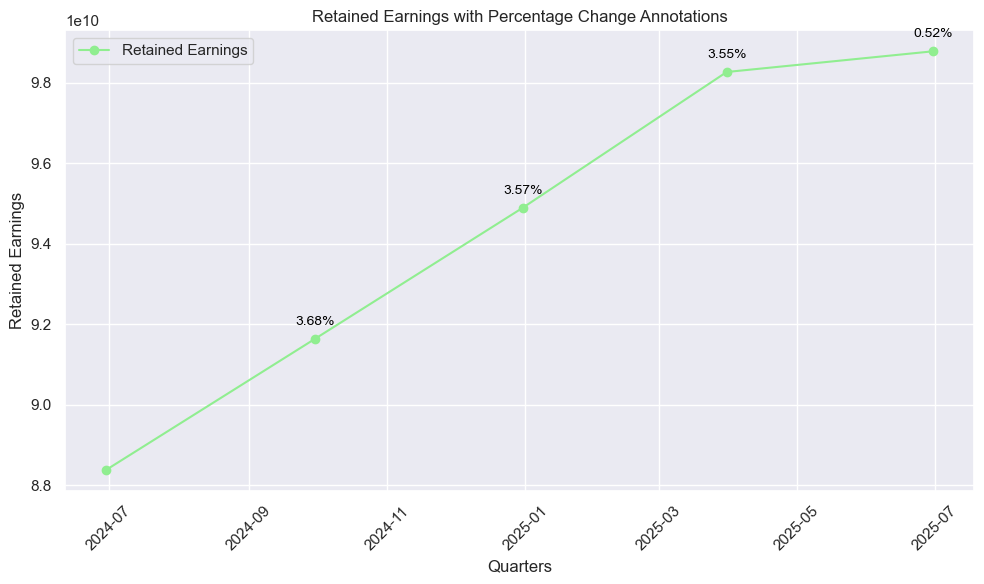

In [32]:
try:
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the Retained Earnings data
    ax.plot(retained_earnings_df.index, retained_earnings_df['Retained Earnings'], marker='o', color='lightgreen', label='Retained Earnings')

    # Annotate the plot with percentage change values from retained_earnings_pct_diff_df_T
    for date, pct_change in retained_earnings_pct_diff_df_T['% Change in Retained Earnings'].items():
        if not pd.isna(pct_change):  # Only annotate if there's a valid percentage change
            ax.annotate(f'{pct_change:.2f}%', 
                        xy=(date, retained_earnings_df.loc[date, 'Retained Earnings']), 
                        xytext=(0, 10),  # Offset to place text above the marker
                        textcoords='offset points',
                        fontsize=10, 
                        color='black', 
                        ha='center')  # Align text horizontally at the center of the point

    # Set labels and title
    plt.xlabel('Quarters')
    plt.ylabel('Retained Earnings')
    plt.title('Retained Earnings with Percentage Change Annotations')

    # Rotate date labels for better readability
    plt.xticks(rotation=45)

    # Add a legend
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"An exception occurred: {e}")

## 3.2 Liabilities

In [33]:
balance_df_liabilities = quarterly_balance_sheet_df.loc[['Payables','Current Debt And Capital Lease Obligation','Long Term Debt And Capital Lease Obligation', 'Total Capitalization']]
balance_df_liabilities

,2025-06-30,2025-03-31,2024-12-31,2024-09-30,2024-06-30,2023-12-31
Payables,3099000000.0,3716000000.0,11932000000.0,3040000000.0,3691000000.0,NaN
Current Debt And Capital Lease Obligation,NaN,NaN,37821000000.0,NaN,NaN,46756000000.0
Long Term Debt And Capital Lease Obligation,311963000000.0,318216000000.0,289902000000.0,321933000000.0,311862000000.0,NaN
Total Capitalization,412464000000.0,419601000000.0,386827000000.0,418532000000.0,407735000000.0,NaN


In [34]:
pct_diff_balance_df_liabilities = balance_df_liabilities.apply(calculate_pct_diff, axis=1, result_type='expand')

# Convert column names to datetime and format them properly
year_columns = pd.to_datetime(balance_df_liabilities.columns).strftime('%m.%Y')

# Dynamically generate column names based on the original DataFrame
pct_diff_balance_df_liabilities.columns = [f"{year_columns[i]} vs {year_columns[i+1]}" for i in range(len(year_columns) - 1)]

pct_diff_balance_df_liabilities

,06.2025 vs 03.2025,03.2025 vs 12.2024,12.2024 vs 09.2024,09.2024 vs 06.2024,06.2024 vs 12.2023
Payables,-16.603875,-68.856856,292.500000,-17.637497,NaN
Current Debt And Capital Lease Obligation,NaN,NaN,NaN,NaN,NaN
Long Term Debt And Capital Lease Obligation,-1.965017,9.766749,-9.949586,3.229313,NaN
Total Capitalization,-1.700902,8.472521,-7.575287,2.648043,NaN


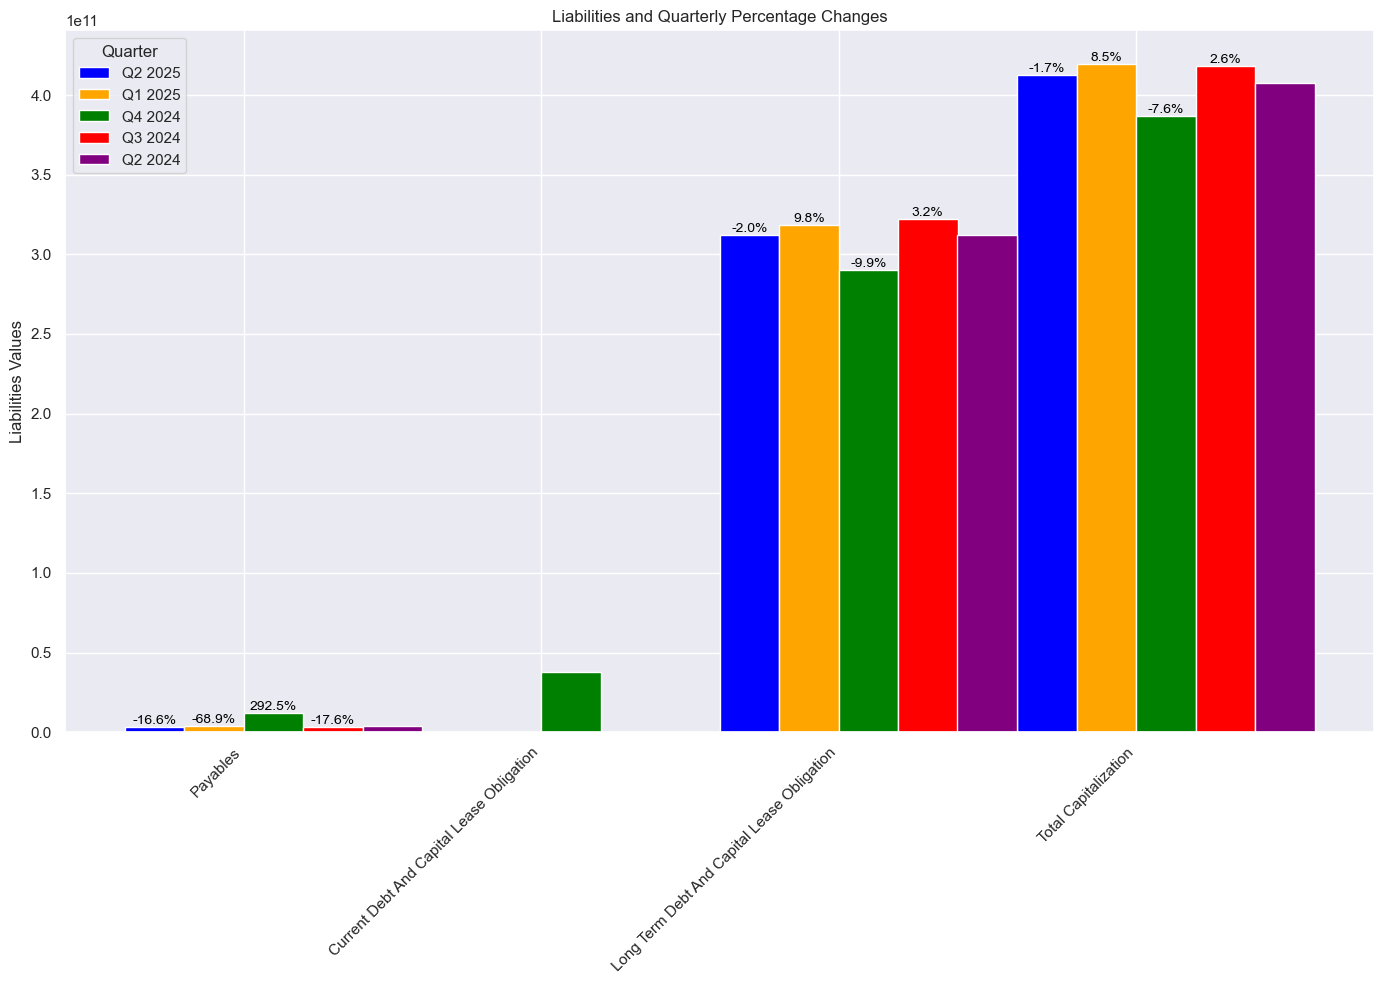

In [35]:
# Convert columns to string format "MM.YYYY"
column_strings = [col.strftime('%m.%Y') for col in balance_df_liabilities.columns]

# Extract quarter and year manually
quarter_columns = [f"Q{(int(col[:2])-1)//3 + 1} {col[3:]}" for col in column_strings]

# Dynamically generate column names with quarter and year
pct_diff_balance_df_liabilities.columns = [f"{quarter_columns[i]} vs {quarter_columns[i+1]}" for i in range(len(quarter_columns) - 1)]

# Plot
fig, ax = plt.subplots(figsize=(14, 10))
x = np.arange(len(balance_df_liabilities.index))  # X positions
width = 0.2  # Bar width
colors = ['blue', 'orange', 'green', 'red', 'purple']

for i, (col, color) in enumerate(zip(balance_df_liabilities.columns[:-1], colors)):
    values = balance_df_liabilities[col]
    ax.bar(x + i * width, values, width=width, label=quarter_columns[i], color=color)
    
    # Add percentage text annotations
    for j, val in enumerate(values):
        if not np.isnan(val):
            pct_change = pct_diff_balance_df_liabilities.iloc[j, i]
            if not np.isnan(pct_change):
                ax.text(x[j] + i * width, val, f"{pct_change:.1f}%", ha='center', va='bottom', fontsize=10, color='black')

# Labels & formatting
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(balance_df_liabilities.index, rotation=45, ha='right')
ax.set_ylabel("Liabilities Values")
ax.set_title("Liabilities and Quarterly Percentage Changes")
ax.legend(title="Quarter")
plt.tight_layout()
plt.show()


## 3.3 Assets 

In [36]:
balance_df_assets = quarterly_balance_sheet_df.loc[['Cash Cash Equivalents And Federal Funds Sold','Investments And Advances','Available For Sale Securities','Trading Securities','Net PPE','Goodwill And Other Intangible Assets']]
balance_df_assets

,2025-06-30,2025-03-31,2024-12-31,2024-09-30,2024-06-30,2023-12-31
Cash Cash Equivalents And Federal Funds Sold,288381000000.0,292469000000.0,279790000000.0,291953000000.0,269604000000.0,NaN
Investments And Advances,299457000000.0,334712000000.0,314244000000.0,288741000000.0,292161000000.0,NaN
Available For Sale Securities,127469000000.0,135618000000.0,188164000000.0,119099000000.0,122637000000.0,NaN
Trading Securities,101568000000.0,107954000000.0,99282000000.0,90210000000.0,88287000000.0,NaN
Net PPE,28174000000.0,29987000000.0,31212000000.0,31612000000.0,32764000000.0,NaN
Goodwill And Other Intangible Assets,17249000000.0,19150000000.0,19259000000.0,19077000000.0,19359000000.0,NaN


In [37]:
pct_diff_balance_df_assets = balance_df_assets.apply(calculate_pct_diff, axis=1, result_type='expand')

# Convert column names to datetime and format them properly
year_columns = pd.to_datetime(balance_df_assets.columns).strftime('%m.%Y')

# Dynamically generate column names based on the original DataFrame
pct_diff_balance_df_assets.columns = [f"{year_columns[i]} vs {year_columns[i+1]}" for i in range(len(year_columns) - 1)]

pct_diff_balance_df_assets

,06.2025 vs 03.2025,03.2025 vs 12.2024,12.2024 vs 09.2024,09.2024 vs 06.2024,06.2024 vs 12.2023
Cash Cash Equivalents And Federal Funds Sold,-1.397755,4.531613,-4.166082,8.289565,NaN
Investments And Advances,-10.532936,6.513410,8.832483,-1.170587,NaN
Available For Sale Securities,-6.008789,-27.925639,57.989572,-2.884937,NaN
Trading Securities,-5.915483,8.734715,10.056535,2.178124,NaN
Net PPE,-6.045953,-3.924773,-1.265342,-3.516054,NaN
Goodwill And Other Intangible Assets,-9.926893,-0.565969,0.954028,-1.456687,NaN


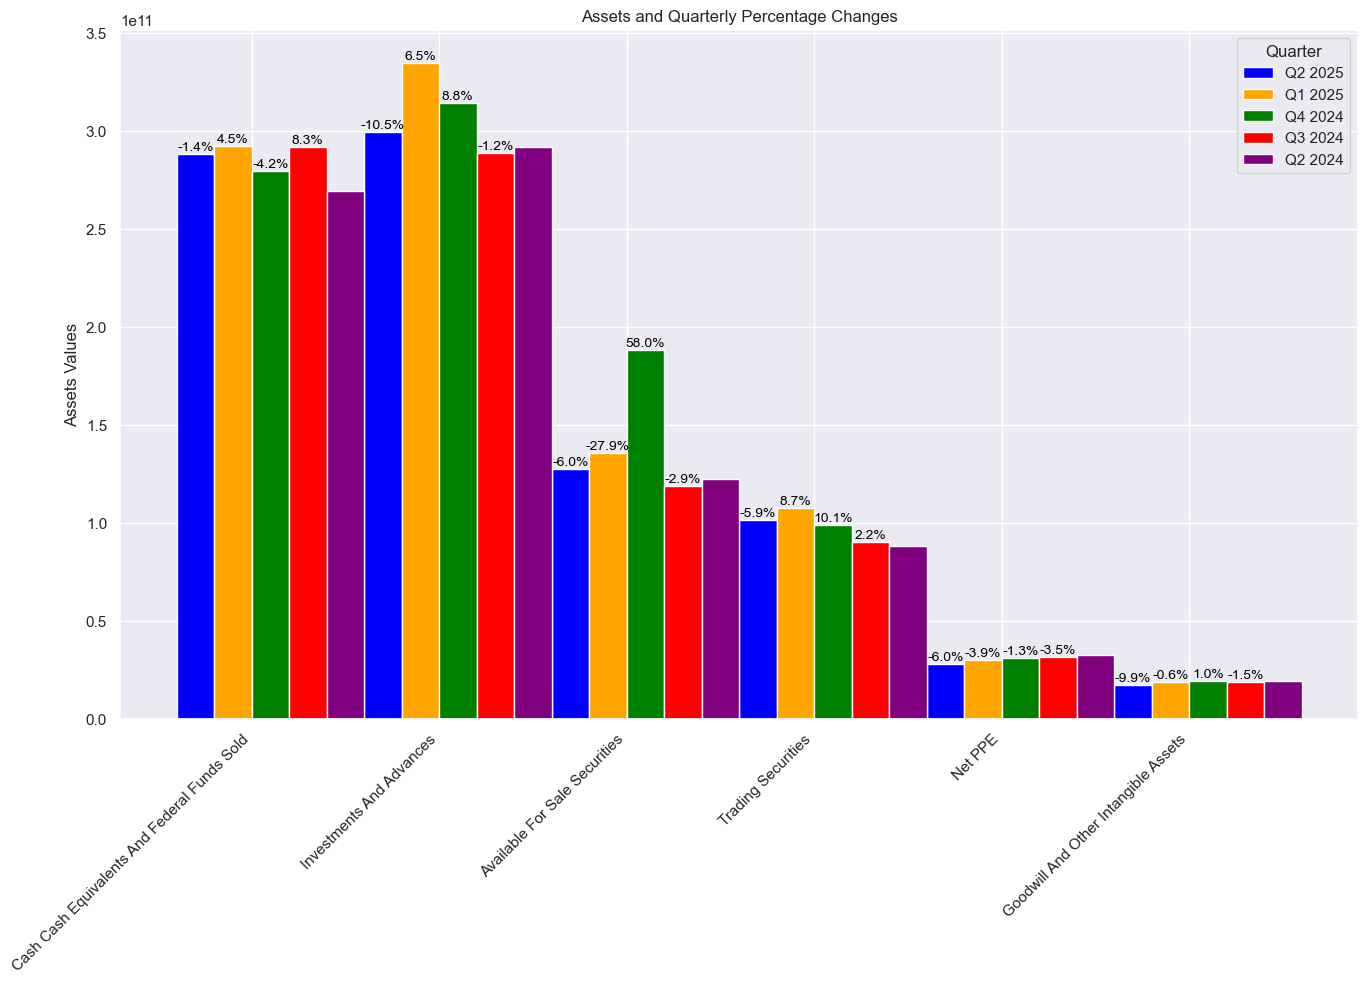

In [38]:
# Convert columns to string format "MM.YYYY"
column_strings = [col.strftime('%m.%Y') for col in balance_df_assets.columns]

# Extract quarter and year manually
quarter_columns = [f"Q{(int(col[:2])-1)//3 + 1} {col[3:]}" for col in column_strings]

# Dynamically generate column names with quarter and year
pct_diff_balance_df_assets.columns = [f"{quarter_columns[i]} vs {quarter_columns[i+1]}" for i in range(len(quarter_columns) - 1)]

# Plot
fig, ax = plt.subplots(figsize=(14, 10))
x = np.arange(len(balance_df_assets.index))  # X positions
width = 0.2  # Bar width
colors = ['blue', 'orange', 'green', 'red', 'purple']

for i, (col, color) in enumerate(zip(balance_df_assets.columns[:-1], colors)):
    values = balance_df_assets[col]
    ax.bar(x + i * width, values, width=width, label=quarter_columns[i], color=color)
    
    # Add percentage text annotations
    for j, val in enumerate(values):
        if not np.isnan(val):
            pct_change = pct_diff_balance_df_assets.iloc[j, i]
            if not np.isnan(pct_change):
                ax.text(x[j] + i * width, val, f"{pct_change:.1f}%", ha='center', va='bottom', fontsize=10, color='black')

# Labels & formatting
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(balance_df_assets.index, rotation=45, ha='right')
ax.set_ylabel("Assets Values")
ax.set_title("Assets and Quarterly Percentage Changes")
ax.legend(title="Quarter")
plt.tight_layout()
plt.show()

## 3.4 Balance Sheet for the last quarter with Vertical Analysis

In [39]:
balance_sheet_df = pd.DataFrame(stock.quarterly_balance_sheet)
balance_sheet_df_last = pd.DataFrame(balance_sheet_df.iloc[:,0])
balance_sheet_df_last

,2025-06-30
Treasury Shares Number,1325372.0
Ordinary Shares Number,14884000000.0
Share Issued,14885325372.0
Net Debt,23582000000.0
Total Debt,311963000000.0
Tangible Book Value,83252000000.0
Invested Capital,412464000000.0
Net Tangible Assets,83252000000.0
Capital Lease Obligations,NaN
Common Stock Equity,100501000000.0


In [40]:
total_assets = balance_sheet_df_last.loc['Total Assets'].values[0]
balance_sheet_df_last['Percentage from Total Assets/Liabilities'] = balance_sheet_df_last.iloc[:, [0]] / total_assets * 100
balance_sheet_df_last

,2025-06-30 00:00:00,Percentage from Total Assets/Liabilities
Treasury Shares Number,1325372.0,0.000073
Ordinary Shares Number,14884000000.0,0.819654
Share Issued,14885325372.0,0.819727
Net Debt,23582000000.0,1.298648
Total Debt,311963000000.0,17.179639
Tangible Book Value,83252000000.0,4.584644
Invested Capital,412464000000.0,22.714176
Net Tangible Assets,83252000000.0,4.584644
Capital Lease Obligations,NaN,NaN
Common Stock Equity,100501000000.0,5.534537


## 3.5 Balance Sheet for the previous quarter with Vertical Analysis

In [41]:
balance_sheet_df = pd.DataFrame(stock.quarterly_balance_sheet)
balance_sheet_df_prev = pd.DataFrame(balance_sheet_df.iloc[:,1])
balance_sheet_df_prev

,2025-03-31
Treasury Shares Number,115426371.0
Ordinary Shares Number,15037065951.0
Share Issued,15152492322.0
Net Debt,25747000000.0
Total Debt,318216000000.0
Tangible Book Value,82235000000.0
Invested Capital,419601000000.0
Net Tangible Assets,82235000000.0
Capital Lease Obligations,NaN
Common Stock Equity,101385000000.0


In [42]:
total_assets = balance_sheet_df_prev.loc['Total Assets'].values[0]
balance_sheet_df_prev['Percentage from Total Assets/Liabilities'] = balance_sheet_df_prev.iloc[:, [0]] / total_assets * 100
balance_sheet_df_prev

,2025-03-31 00:00:00,Percentage from Total Assets/Liabilities
Treasury Shares Number,115426371.0,0.006256
Ordinary Shares Number,15037065951.0,0.814939
Share Issued,15152492322.0,0.821195
Net Debt,25747000000.0,1.395367
Total Debt,318216000000.0,17.245825
Tangible Book Value,82235000000.0,4.456754
Invested Capital,419601000000.0,22.74042
Net Tangible Assets,82235000000.0,4.456754
Capital Lease Obligations,NaN,NaN
Common Stock Equity,101385000000.0,5.494595


## 3.6 Balance Sheet for the last two quarters with Vertical Analysis

In [43]:
df_concat_balance = pd.concat([balance_sheet_df_last, balance_sheet_df_prev], axis=1)
df_concat_balance

,2025-06-30 00:00:00,Percentage from Total Assets/Liabilities,2025-03-31 00:00:00,Percentage from Total Assets/Liabilities
Treasury Shares Number,1325372.0,0.000073,115426371.0,0.006256
Ordinary Shares Number,14884000000.0,0.819654,15037065951.0,0.814939
Share Issued,14885325372.0,0.819727,15152492322.0,0.821195
Net Debt,23582000000.0,1.298648,25747000000.0,1.395367
Total Debt,311963000000.0,17.179639,318216000000.0,17.245825
Tangible Book Value,83252000000.0,4.584644,82235000000.0,4.456754
Invested Capital,412464000000.0,22.714176,419601000000.0,22.74042
Net Tangible Assets,83252000000.0,4.584644,82235000000.0,4.456754
Capital Lease Obligations,NaN,NaN,NaN,NaN
Common Stock Equity,100501000000.0,5.534537,101385000000.0,5.494595


In [44]:
try:
  retained_earnings = df_concat_balance.loc['Retained Earnings'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)
  print(retained_earnings)
except Exception:
  print("An exception occurred") 

2025-06-30 00:00:00                         98787000000.000000
Percentage from Total Assets/Liabilities              5.440148
2025-03-31 00:00:00                         98273000000.000000
Percentage from Total Assets/Liabilities              5.325939
Name: Retained Earnings, dtype: object


In [45]:
df_concat_balance.loc['Cash Cash Equivalents And Federal Funds Sold'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2025-06-30 00:00:00                         288381000000.000000
Percentage from Total Assets/Liabilities              15.880990
2025-03-31 00:00:00                         292469000000.000000
Percentage from Total Assets/Liabilities              15.850458
Name: Cash Cash Equivalents And Federal Funds Sold, dtype: object

In [46]:
df_concat_balance.loc['Investments And Advances'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2025-06-30 00:00:00                         299457000000.000000
Percentage from Total Assets/Liabilities              16.490940
2025-03-31 00:00:00                         334712000000.000000
Percentage from Total Assets/Liabilities              18.139832
Name: Investments And Advances, dtype: object

In [47]:
try:
  texes_receivable = df_concat_balance.loc['Invested Capital'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)
  print(texes_receivable)
except Exception:
  print("An exception occurred") 

2025-06-30 00:00:00                         412464000000.000000
Percentage from Total Assets/Liabilities              22.714176
2025-03-31 00:00:00                         419601000000.000000
Percentage from Total Assets/Liabilities              22.740420
Name: Invested Capital, dtype: object


In [48]:
try:
  account_receivable = df_concat_balance.loc['Net PPE'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)
  print(account_receivable)
except Exception:
  print("An exception occurred") 

2025-06-30 00:00:00                         28174000000.000000
Percentage from Total Assets/Liabilities              1.551527
2025-03-31 00:00:00                         29987000000.000000
Percentage from Total Assets/Liabilities              1.625156
Name: Net PPE, dtype: object


In [49]:
try:
    goodwill = df_concat_balance.loc['Goodwill'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)
    print(goodwill)
except Exception:
    print("An exception occurred") 

2025-06-30 00:00:00                         11960000000.000000
Percentage from Total Assets/Liabilities              0.658631
2025-03-31 00:00:00                         13510000000.000000
Percentage from Total Assets/Liabilities              0.732179
Name: Goodwill, dtype: object


In [50]:
df_concat_balance.loc['Long Term Debt'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2025-06-30 00:00:00                         311963000000.000000
Percentage from Total Assets/Liabilities              17.179639
2025-03-31 00:00:00                         318216000000.000000
Percentage from Total Assets/Liabilities              17.245825
Name: Long Term Debt, dtype: object

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 4. Quarterly Cash Flow Statement

In [51]:
cash_flow = stock.quarterly_cash_flow
cash_flow

""


## 4.1 Free Cash Flow

In [52]:
try:
    free_cash_flow = pd.DataFrame(cash_flow.loc['Free Cash Flow']).dropna()
    print(free_cash_flow)
except:
    print("An exception occurred")

An exception occurred


In [53]:
try:
    # Calculate percentage changes
    free_cash_flow_pct_diff = calculate_pct_diff(cash_flow.loc['Free Cash Flow'])
    
    # Convert result into a DataFrame for readability
    free_cash_flow_pct_diff_df = pd.DataFrame(
        [free_cash_flow_pct_diff],
        columns=cash_flow.columns[:-1],  # Exclude the last column since it has no comparison
        index=['% Change in Free Cash Flow']
    )
    print(free_cash_flow_pct_diff_df)
except:
    print("An exception occurred")

An exception occurred


In [54]:
try:
    free_cash_flow_pct_diff_df_T  = free_cash_flow_pct_diff_df.T
    print(free_cash_flow_pct_diff_df_T)
except:
    print("An exception occurred")

An exception occurred


An exception occurred


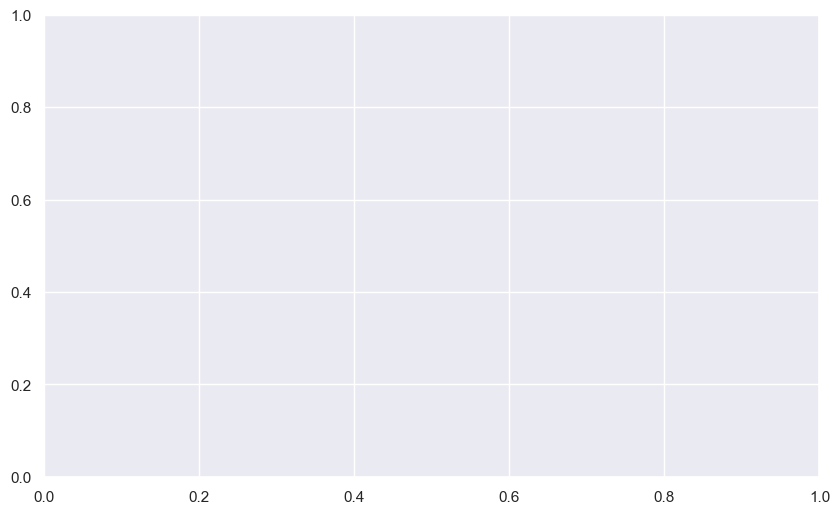

In [55]:
try:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot the Free Cash Flow data
    ax.plot(free_cash_flow.index, free_cash_flow['Free Cash Flow'], marker = 'o', color = 'skyblue')
    
    # Annotate the plot with percentage change values from free_cash_flow_pct_diff_df_T
    for date, pct_change in free_cash_flow_pct_diff_df_T['% Change in Free Cash Flow'].items():
        if not pd.isna(pct_change):  # Only annotate if there's a valid percentage change
            # Adjust the text offset for better visibility below the markers
            ax.annotate(f'{pct_change:.2f}%', 
                        xy=(date, free_cash_flow.loc[date, 'Free Cash Flow']), 
                        xytext=(0, 10),  # Negative vertical offset to place text above the marker
                        textcoords='offset points',
                        fontsize=10, 
                        color='black', 
                        ha='center')  # Align text horizontally at the center of the point
    
    # Set labels and title
    plt.xlabel('Years')
    plt.ylabel('Free Cash Flow')
    plt.title('Free Cash Flow with Percentage Change Annotations')
    
    # Rotate date labels for better readability
    plt.xticks(rotation=45)
    
    # Show the plot
    plt.show()
except:
    print("An exception occurred")

## 4.2 Cash Flow DF

In [56]:
try:
    cash_flow_df = cash_flow.loc[['Operating Cash Flow','Investing Cash Flow', 'Financing Cash Flow']]
    print(cash_flow_df)
except:
    print("An exception occurred")

An exception occurred


In [57]:
try:
    transposed_cash_flow_df = cash_flow_df.T
    
    # Plot each column as a bar plot in subplots
    transposed_cash_flow_df.plot(
        kind='bar',
        subplots=True,
        figsize=(8, 10),
        sharex=False,
        sharey=False,
        legend=False,  # Hide legends since column names are the titles
        color='skyblue',
        edgecolor='black',
    )
    
    # Add titles and layout adjustments
    for i, ax in enumerate(plt.gcf().axes):
        ax.set_title(transposed_cash_flow_df.columns[i])  # Set column names as titles
        ax.set_xlabel("Year")
        ax.set_ylabel("Value")
        for bar in ax.patches:
            height = bar.get_height()
            if not pd.isna(height):  # Annotate bar values
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    height,
                    f"{height:,.0f}",
                    ha="center",
                    va="bottom",
                    fontsize=9,
                    rotation=90,
                )
    
    plt.tight_layout()
    plt.show()
except:
    print("An exception occurred")

An exception occurred


## 4.3 Percentage changes in Cash Flow DF

In [58]:
try:
    pct_diff_cash_flow_df = cash_flow_df.apply(calculate_pct_diff, axis=1, result_type='expand')
    
    # Convert column names to datetime and format them properly
    year_columns = pd.to_datetime(cash_flow_df.columns).strftime('%Y')
    
    # Dynamically generate column names based on the original DataFrame
    pct_diff_cash_flow_df.columns = [f"{year_columns[i]} vs {year_columns[i+1]}" for i in range(len(year_columns) - 1)]
    
    transposed_pct_diff_cash_flow_df = pct_diff_cash_flow_df.T
    
    # Remove empty plots if any (subplots with no data)
    fig, axes = plt.subplots(figsize=(8, 10), nrows=transposed_cash_flow_df.shape[1], ncols=1)
    
    # Plot the raw cash flow data (values) and percentage changes
    for i, ax in enumerate(axes):
        if i < transposed_cash_flow_df.shape[1]:  # Ensure we're within bounds
            # Plot each row (corresponding to a year) as a bar plot
            transposed_cash_flow_df.iloc[:, i].plot(
                kind='bar',
                ax=ax,
                color='skyblue',
                edgecolor='black',
                legend=False,
            )
    
            # Set the title and labels
            ax.set_title(transposed_cash_flow_df.columns[i])  # Set the title for each subplot
            ax.set_xlabel("Year")
            ax.set_ylabel("Value")
    
            # Add annotations for percentage changes
            for j, bar in enumerate(ax.patches):
                height = bar.get_height()
    
                if not pd.isna(height):  # Check if the value is not NaN
                    # Extract the corresponding percentage change
                    if j < len(transposed_pct_diff_cash_flow_df.index) and i < len(transposed_pct_diff_cash_flow_df.columns):
                        pct_change = transposed_pct_diff_cash_flow_df.iloc[j, i]  # Correct row and column access
                    else:
                        pct_change = None
    
                    if pd.notna(pct_change):  # Only annotate if the percentage change is available
                        ax.text(
                            bar.get_x() + bar.get_width() / 2,
                            bar.get_height(),
                            f"{pct_change:.2f}%",  # Annotation with percentage change
                            ha="center",
                            va="bottom",
                            fontsize=9,
                            rotation=90,
                        )
    
    plt.tight_layout()
    plt.show()
except:
    print("An exception occurred")

An exception occurred


<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

## 5. Quarterly Income Statement

In [59]:
income_statement = pd.DataFrame(stock.quarterly_income_stmt).astype(float)
income_statement

,2025-06-30,2025-03-31,2024-12-31,2024-09-30,2024-06-30,2024-03-31
Tax Effect Of Unusual Items,3.401857e+07,-5.826374e+07,-3.877478e+07,-4.353121e+07,5.674396e+07,NaN
Tax Rate For Calcs,2.362400e-01,2.787740e-01,2.254350e-01,2.703800e-01,2.940100e-01,NaN
Total Unusual Items,1.440000e+08,-2.090000e+08,-1.720000e+08,-1.610000e+08,1.930000e+08,NaN
Total Unusual Items Excluding Goodwill,1.440000e+08,-2.090000e+08,-1.720000e+08,-1.610000e+08,1.930000e+08,NaN
Net Income From Continuing Operation Net Minority Interest,3.081000e+09,3.402000e+09,3.265000e+09,3.250000e+09,3.207000e+09,NaN
Reconciled Depreciation,8.040000e+08,8.540000e+08,8.240000e+08,8.140000e+08,8.280000e+08,NaN
Net Interest Income,1.059000e+10,1.137800e+10,1.198600e+10,1.122500e+10,1.147400e+10,NaN
Interest Expense,NaN,1.552500e+10,NaN,NaN,NaN,1.726000e+10
Interest Income,1.059000e+10,2.690300e+10,1.198600e+10,1.122500e+10,1.147400e+10,NaN
Normalized Income,2.971019e+09,3.552736e+09,3.398225e+09,3.367469e+09,3.070744e+09,NaN


## 5.1 Income Statement DF

In [60]:
income_statement_df = income_statement.loc[['Total Revenue','General And Administrative Expense','Net Income Common Stockholders',
                                                'Diluted EPS']]
income_statement_df

,2025-06-30,2025-03-31,2024-12-31,2024-09-30,2024-06-30,2024-03-31
Total Revenue,1.433200e+10,1.605200e+10,1.581200e+10,1.494100e+10,1.549000e+10,NaN
General And Administrative Expense,5.304000e+09,5.154000e+09,5.457000e+09,5.088000e+09,5.104000e+09,NaN
Net Income Common Stockholders,3.431000e+09,3.402000e+09,3.265000e+09,3.250000e+09,3.207000e+09,NaN
Diluted EPS,2.200000e-01,2.100000e-01,2.000000e-01,2.000000e-01,2.000000e-01,NaN


In [61]:
pct_diff_income_statement_df = income_statement_df.apply(calculate_pct_diff, axis=1, result_type='expand')

# Convert column names to datetime and format them properly
year_columns = pd.to_datetime(income_statement_df.columns).strftime('%m.%Y')

# Dynamically generate column names based on the original DataFrame
pct_diff_income_statement_df.columns = [f"{year_columns[i]} vs {year_columns[i+1]}" for i in range(len(year_columns) - 1)]

pct_diff_income_statement_df

,06.2025 vs 03.2025,03.2025 vs 12.2024,12.2024 vs 09.2024,09.2024 vs 06.2024,06.2024 vs 03.2024
Total Revenue,-10.715176,1.517835,5.829596,-3.544222,NaN
General And Administrative Expense,2.910361,-5.552501,7.252358,-0.313480,NaN
Net Income Common Stockholders,0.852440,4.196018,0.461538,1.340817,NaN
Diluted EPS,4.761905,5.000000,0.000000,0.000000,NaN


In [62]:
transposed_df_income = income_statement_df.T
transposed_df_income

,Total Revenue,General And Administrative Expense,Net Income Common Stockholders,Diluted EPS
2025-06-30,1.433200e+10,5.304000e+09,3.431000e+09,0.22
2025-03-31,1.605200e+10,5.154000e+09,3.402000e+09,0.21
2024-12-31,1.581200e+10,5.457000e+09,3.265000e+09,0.20
2024-09-30,1.494100e+10,5.088000e+09,3.250000e+09,0.20
2024-06-30,1.549000e+10,5.104000e+09,3.207000e+09,0.20
2024-03-31,NaN,NaN,NaN,NaN


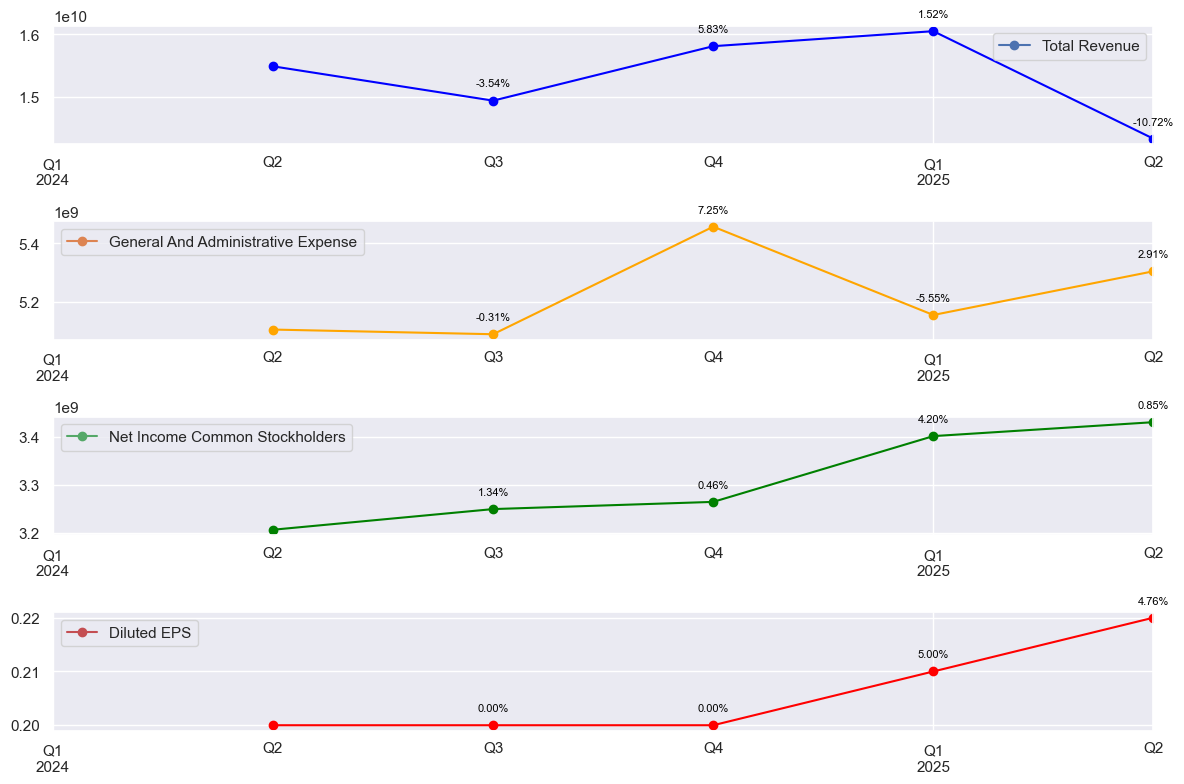

In [63]:
# Create subplots and assign unique colors
ax = transposed_df_income.plot(kind='line', marker='o', subplots=True, figsize=(12, 8), sharex=False, sharey=False)

# Assign distinct colors
for idx, axis in enumerate(ax):  # Loop through subplots
    color = colors[idx % len(colors)]  # Cycle through colors if needed
    for line in axis.get_lines():
        line.set_color(color)  # Apply unique color to each subplot

    # Add percentage change annotations from pct_diff_income_statement_df
    for i, (x, y) in enumerate(zip(transposed_df_income.index, transposed_df_income.iloc[:, idx])):
        if i < len(pct_diff_income_statement_df.columns):  # Ensure we don't go out of bounds
            pct_change = pct_diff_income_statement_df.iloc[idx, i]  # Get percentage change value
            if not pd.isna(pct_change):  # Only annotate if the value is not NaN
                # Use the actual x value from the plot for annotation
                axis.annotate(
                    f'{pct_change:.2f}%', 
                    (x, y),  # Use the actual x value from the plot
                    textcoords="offset points", 
                    xytext=(0, 10),  # Position the annotation 10 points above the data point
                    ha='center',  # Center the annotation horizontally
                    fontsize=8,  # Adjust font size if needed
                    color='black'  # Set annotation color
                )

plt.tight_layout()
plt.show()

## 5.2 Income Statement for the last quarter with Vertical Analysis

In [64]:
income_statement_last = pd.DataFrame(income_statement.iloc[:,0])
income_statement_last

,2025-06-30
Tax Effect Of Unusual Items,3.401857e+07
Tax Rate For Calcs,2.362400e-01
Total Unusual Items,1.440000e+08
Total Unusual Items Excluding Goodwill,1.440000e+08
Net Income From Continuing Operation Net Minority Interest,3.081000e+09
Reconciled Depreciation,8.040000e+08
Net Interest Income,1.059000e+10
Interest Expense,NaN
Interest Income,1.059000e+10
Normalized Income,2.971019e+09


In [65]:
revenue = income_statement_last.loc['Operating Revenue'].values[0]
income_statement_last['Percentage from Operating Revenue'] = income_statement_last.iloc[:, [0]] / revenue * 100
income_statement_last

,2025-06-30 00:00:00,Percentage from Operating Revenue
Tax Effect Of Unusual Items,3.401857e+07,2.373610e-01
Tax Rate For Calcs,2.362400e-01,1.648339e-09
Total Unusual Items,1.440000e+08,1.004745e+00
Total Unusual Items Excluding Goodwill,1.440000e+08,1.004745e+00
Net Income From Continuing Operation Net Minority Interest,3.081000e+09,2.149735e+01
Reconciled Depreciation,8.040000e+08,5.609824e+00
Net Interest Income,1.059000e+10,7.389059e+01
Interest Expense,NaN,NaN
Interest Income,1.059000e+10,7.389059e+01
Normalized Income,2.971019e+09,2.072996e+01


## 5.3 Income Statement for the previous quarter with Vertical Analysis

In [66]:
income_statement_prev = pd.DataFrame(income_statement.iloc[:,1])
income_statement_prev

,2025-03-31
Tax Effect Of Unusual Items,-5.826374e+07
Tax Rate For Calcs,2.787740e-01
Total Unusual Items,-2.090000e+08
Total Unusual Items Excluding Goodwill,-2.090000e+08
Net Income From Continuing Operation Net Minority Interest,3.402000e+09
Reconciled Depreciation,8.540000e+08
Net Interest Income,1.137800e+10
Interest Expense,1.552500e+10
Interest Income,2.690300e+10
Normalized Income,3.552736e+09


In [67]:
revenue = income_statement_prev.loc['Operating Revenue'].values[0]
income_statement_prev['Percentage from Operating Revenue'] = income_statement_prev.iloc[:, [0]] / revenue * 100
income_statement_prev

,2025-03-31 00:00:00,Percentage from Operating Revenue
Tax Effect Of Unusual Items,-5.826374e+07,-3.629687e-01
Tax Rate For Calcs,2.787740e-01,1.736693e-09
Total Unusual Items,-2.090000e+08,-1.302018e+00
Total Unusual Items Excluding Goodwill,-2.090000e+08,-1.302018e+00
Net Income From Continuing Operation Net Minority Interest,3.402000e+09,2.119362e+01
Reconciled Depreciation,8.540000e+08,5.320209e+00
Net Interest Income,1.137800e+10,7.088213e+01
Interest Expense,1.552500e+10,9.671692e+01
Interest Income,2.690300e+10,1.675991e+02
Normalized Income,3.552736e+09,2.213267e+01


## 5.4 Income Statement for the last two quarters with Vertical Analysis

In [68]:
df_concat_income = pd.concat([income_statement_last, income_statement_prev], axis=1)
df_concat_income

,2025-06-30 00:00:00,Percentage from Operating Revenue,2025-03-31 00:00:00,Percentage from Operating Revenue
Tax Effect Of Unusual Items,3.401857e+07,2.373610e-01,-5.826374e+07,-3.629687e-01
Tax Rate For Calcs,2.362400e-01,1.648339e-09,2.787740e-01,1.736693e-09
Total Unusual Items,1.440000e+08,1.004745e+00,-2.090000e+08,-1.302018e+00
Total Unusual Items Excluding Goodwill,1.440000e+08,1.004745e+00,-2.090000e+08,-1.302018e+00
Net Income From Continuing Operation Net Minority Interest,3.081000e+09,2.149735e+01,3.402000e+09,2.119362e+01
Reconciled Depreciation,8.040000e+08,5.609824e+00,8.540000e+08,5.320209e+00
Net Interest Income,1.059000e+10,7.389059e+01,1.137800e+10,7.088213e+01
Interest Expense,NaN,NaN,1.552500e+10,9.671692e+01
Interest Income,1.059000e+10,7.389059e+01,2.690300e+10,1.675991e+02
Normalized Income,2.971019e+09,2.072996e+01,3.552736e+09,2.213267e+01


In [69]:
df_concat_income.loc['Operating Revenue'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2025-06-30 00:00:00                  14332000000.000000
Percentage from Operating Revenue            100.000000
2025-03-31 00:00:00                  16052000000.000000
Percentage from Operating Revenue            100.000000
Name: Operating Revenue, dtype: object

In [70]:
df_concat_income.loc['General And Administrative Expense'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2025-06-30 00:00:00                  5304000000.000000
Percentage from Operating Revenue            37.008094
2025-03-31 00:00:00                  5154000000.000000
Percentage from Operating Revenue            32.108149
Name: General And Administrative Expense, dtype: object

In [71]:
df_concat_income.loc['Net Income Common Stockholders'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2025-06-30 00:00:00                  3431000000.000000
Percentage from Operating Revenue            23.939436
2025-03-31 00:00:00                  3402000000.000000
Percentage from Operating Revenue            21.193621
Name: Net Income Common Stockholders, dtype: object

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 6. Ratio Analysis

__Net Profit Margin%__

In [72]:
net_profit_margin = (income_statement.loc['Net Income'].replace(0, np.nan).astype(float)/ income_statement.loc['Total Revenue'].replace(0, np.nan).astype(float)) * 100
net_profit_margin

2025-06-30    23.939436
2025-03-31    21.193621
2024-12-31    20.648874
2024-09-30    21.752225
2024-06-30    20.703680
2024-03-31          NaN
dtype: float64

__ROA%__

In [73]:
net_income = income_statement.loc['Net Income'].replace(0, np.nan).astype(float)
avg_assets = balance_sheet_df.loc['Total Assets'].replace(0, np.nan).astype(float).rolling(2).mean()
ROA = net_income / avg_assets  * 100
ROA

2023-12-31         NaN
2024-03-31         NaN
2024-06-30    0.178737
2024-09-30    0.178604
2024-12-31    0.177337
2025-03-31    0.185848
2025-06-30         NaN
Freq: QE-DEC, dtype: float64

__Asset Turnover%__

In [74]:
asset_turnover = income_statement.loc['Total Revenue'].replace(0, np.nan).astype(float) / avg_assets * 100
asset_turnover

2023-12-31         NaN
2024-03-31         NaN
2024-06-30    0.863309
2024-09-30    0.821083
2024-12-31    0.858821
2025-03-31    0.876903
2025-06-30         NaN
Freq: QE-DEC, dtype: float64

__Equity Ratio%__

The Equity Ratio shows how much “ownership” shareholders have compared to the overall size of the bank. <br>
For banks, however, an equity ratio of 5–10% is considered normal, since their business model relies heavily on borrowed funds (deposits, debt). <br>
The higher the Equity Ratio, the greater the capital buffer the bank has to absorb potential losses.

In [75]:
equity_ratio = balance_sheet_df.loc['Common Stock Equity'].replace(0, np.nan).astype(float)/balance_sheet_df.loc['Total Assets'].replace(0, np.nan).astype(float) * 100
equity_ratio

2025-06-30    5.534537
2025-03-31    5.494595
2024-12-31    5.367265
2024-09-30    5.359884
2024-06-30    5.367245
2023-12-31         NaN
dtype: float64

__Leverage__

If Leverage = 1, it means that the assets are financed entirely with equity (no debt). <br>
If Leverage = 20, it means that for every 1 unit of equity, the company has 20 units of assets – the rest is financed with debt.

In [76]:
leverage = balance_sheet_df.loc['Total Assets'].replace(0, np.nan).astype(float) / balance_sheet_df.loc['Common Stock Equity'].replace(0, np.nan).astype(float)
leverage

2025-06-30    18.068358
2025-03-31    18.199704
2024-12-31    18.631464
2024-09-30    18.657119
2024-06-30    18.631533
2023-12-31          NaN
dtype: float64

__Cost-to-Income Ratio%__

A lower C/I ratio → the company is more efficient, spending less for each unit of revenue. <br>
A higher C/I ratio → the company spends more relative to its revenue, which may indicate inefficiency. <br>
A good C/I ratio is usually between 40% and 60%.

In [77]:
operating_expenses = (
    income_statement.loc['Selling General And Administration'].fillna(0).astype(float) +
    income_statement.loc['Other Non Interest Expense'].fillna(0).astype(float))
operating_expenses

2025-06-30    5.981000e+09
2025-03-31    6.668000e+09
2024-12-31    7.124000e+09
2024-09-30    6.094000e+09
2024-06-30    6.488000e+09
2024-03-31    0.000000e+00
dtype: float64

In [78]:
operating_income = income_statement_df.loc['Total Revenue'].astype(float)
operating_income

2025-06-30    1.433200e+10
2025-03-31    1.605200e+10
2024-12-31    1.581200e+10
2024-09-30    1.494100e+10
2024-06-30    1.549000e+10
2024-03-31             NaN
Name: Total Revenue, dtype: float64

In [79]:
cost_to_income_ratio = operating_expenses / operating_income * 100
cost_to_income_ratio

2025-06-30    41.731789
2025-03-31    41.539995
2024-12-31    45.054389
2024-09-30    40.787096
2024-06-30    41.885087
2024-03-31          NaN
dtype: float64

__Capital Adequacy Ratio%__

A higher CAR → the bank is more stable, having more capital to cover potential losses. <br>
A lower CAR → the bank is riskier and may face problems under financial stress. <br>
Basel standards for minimum CAR → minimum 8%–10.5%, depending on additional buffers.

In [80]:
tier1_capital = balance_sheet_df.loc['Common Stock Equity'].replace(0, np.nan).astype(float)
tier1_capital

2025-06-30    1.005010e+11
2025-03-31    1.013850e+11
2024-12-31    9.860100e+10
2024-09-30    9.659900e+10
2024-06-30    9.587300e+10
2023-12-31             NaN
Name: Common Stock Equity, dtype: float64

In [81]:
rwa_proxy = balance_sheet_df.loc['Total Assets'].astype(float) * 0.5  
rwa_proxy

2025-06-30    9.079440e+11
2025-03-31    9.225885e+11
2024-12-31    9.185405e+11
2024-09-30    9.011295e+11
2024-06-30    8.931305e+11
2023-12-31             NaN
Name: Total Assets, dtype: float64

In [82]:
CAR_proxy = (tier1_capital / rwa_proxy) * 100
CAR_proxy

2025-06-30    11.069075
2025-03-31    10.989190
2024-12-31    10.734529
2024-09-30    10.719769
2024-06-30    10.734490
2023-12-31          NaN
dtype: float64

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 7. ROIC_bank & WACC

__ROIC_bank__

In [83]:
net_income = income_statement.loc['Net Income']
net_income

2025-06-30    3.431000e+09
2025-03-31    3.402000e+09
2024-12-31    3.265000e+09
2024-09-30    3.250000e+09
2024-06-30    3.207000e+09
2024-03-31             NaN
Name: Net Income, dtype: float64

In [84]:
invested_capital_avg = balance_sheet_df.loc["Common Stock Equity"].astype(float).rolling(2).mean()
invested_capital_avg

2025-06-30             NaN
2025-03-31    1.009430e+11
2024-12-31    9.999300e+10
2024-09-30    9.760000e+10
2024-06-30    9.623600e+10
2023-12-31             NaN
Name: Common Stock Equity, dtype: float64

In [85]:
ROIC_bank = net_income / invested_capital_avg
ROIC_bank

2023-12-31         NaN
2024-03-31         NaN
2024-06-30    0.033324
2024-09-30    0.033299
2024-12-31    0.032652
2025-03-31    0.033702
2025-06-30         NaN
Freq: QE-DEC, dtype: float64

__WACC__

In [86]:
def calculate_wacc(E, D, Ke, Kd, tax_rate):
    equity_weight = E / (E + D)
    debt_weight = D / (E + D)
    wacc = (equity_weight * Ke) + (debt_weight * Kd) * (1 - tax_rate)
    return wacc

In [87]:
E = balance_sheet_df.loc['Common Stock Equity'].replace(0, np.nan).astype(float)
D = balance_sheet_df.loc['Long Term Debt'].replace(0, np.nan).astype(float)
Ke = 0.1
Kd = 0.06
tax_rate = 0.3

In [88]:
wacc_result = calculate_wacc(E, D, Ke, Kd, tax_rate)
wacc_result

2025-06-30    0.056132
2025-03-31    0.056014
2024-12-31    0.056784
2024-09-30    0.055387
2024-06-30    0.055638
2023-12-31         NaN
dtype: float64

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 8.  Long-term Debt to Equity Ratio & Net Interest Margin%

__DE__

In [89]:
long_term_debt = balance_sheet_df.loc['Long Term Debt'].replace(0, np.nan).astype(float)
long_term_debt

2025-06-30    3.119630e+11
2025-03-31    3.182160e+11
2024-12-31    2.882260e+11
2024-09-30    3.219330e+11
2024-06-30    3.118620e+11
2023-12-31             NaN
Name: Long Term Debt, dtype: float64

In [90]:
equity = balance_sheet_df.loc['Common Stock Equity'].replace(0, np.nan).astype(float)
equity

2025-06-30    1.005010e+11
2025-03-31    1.013850e+11
2024-12-31    9.860100e+10
2024-09-30    9.659900e+10
2024-06-30    9.587300e+10
2023-12-31             NaN
Name: Common Stock Equity, dtype: float64

In [91]:
debt_equity_ratio = long_term_debt / equity
debt_equity_ratio

2025-06-30    3.104079
2025-03-31    3.138689
2024-12-31    2.923155
2024-09-30    3.332674
2024-06-30    3.252866
2023-12-31         NaN
dtype: float64

__Net Interest Margin%__

In [92]:
net_interest_income = income_statement.loc['Net Interest Income'].astype(float)
net_interest_income

2025-06-30    1.059000e+10
2025-03-31    1.137800e+10
2024-12-31    1.198600e+10
2024-09-30    1.122500e+10
2024-06-30    1.147400e+10
2024-03-31             NaN
Name: Net Interest Income, dtype: float64

In [93]:
earning_assets = balance_sheet_df.loc['Total Assets'].astype(float)
earning_assets

2025-06-30    1.815888e+12
2025-03-31    1.845177e+12
2024-12-31    1.837081e+12
2024-09-30    1.802259e+12
2024-06-30    1.786261e+12
2023-12-31             NaN
Name: Total Assets, dtype: float64

In [94]:
average_assets = earning_assets.rolling(2).mean()
average_assets

2025-06-30             NaN
2025-03-31    1.830532e+12
2024-12-31    1.841129e+12
2024-09-30    1.819670e+12
2024-06-30    1.794260e+12
2023-12-31             NaN
Name: Total Assets, dtype: float64

In [95]:
NIM = (net_interest_income / average_assets) * 100
NIM

2023-12-31         NaN
2024-03-31         NaN
2024-06-30    0.639484
2024-09-30    0.616870
2024-12-31    0.651014
2025-03-31    0.621568
2025-06-30         NaN
Freq: QE-DEC, dtype: float64

__How much interest income the bank generates for every unit of assets. <br>
3%–4% Healthy NIM. Indicates that the bank efficiently manages the difference between its interest income and interest expenses. <br>
< 3% Low NIM. May signal high funding costs or low interest income.<br> > 4% High NIM. May indicate the bank has a competitive advantage, but it could also result from taking higher risk.__

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 